In [1]:
import jax
jax.config.update("jax_platform_name", "cpu")
# jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp

import time
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
%matplotlib inline

import numpy as np

import spax

In [2]:
def gaussian(x, mu = 0, sigma = 1.):
    return 1 / sigma / np.sqrt(2 * np.pi) * np.exp(-0.5 * (x - mu) ** 2 / sigma ** 2)

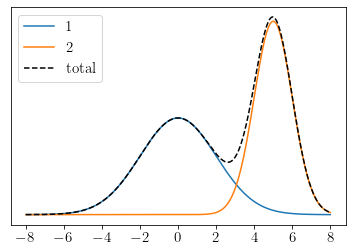

In [6]:
plt.figure()
x = np.linspace(-8, 8, 1000)
plt.plot(x, 0.5 * gaussian(x, mu = 0, sigma = 2.), label = "1")
plt.plot(x, 0.5 * gaussian(x, mu = 5, sigma = 1.), label = "2")
plt.plot(x, 0.5 * (gaussian(x, mu = 0, sigma = 2.) + gaussian(x, mu = 5, sigma = 1.)), "k--", label = "total")
plt.legend(fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks([])
plt.savefig("init_distribution.pdf")

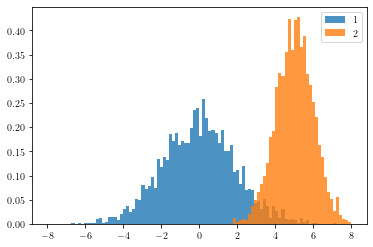

In [7]:
M = 5000
N = 2
x1 = 0 + np.random.normal(scale = 2., size = M // 2)
x2 = 5 + np.random.normal(scale = 1., size = M // 2)
data = np.concatenate((x1, x2), axis = 0).reshape(1, -1)

data_1 = 0 + np.random.normal(scale = 2., size = M // 2)
data_1 = data_1.reshape(1, -1)
data_2 = 5 + np.random.normal(scale = 1., size = M // 2)
data_2 = data_2.reshape(1, -1)

plt.figure()
plt.hist(data_1[0], bins = 100, range = (-8, 8), density = True, label = "1", alpha = 0.8)
plt.hist(data_2[0], bins = 100, range = (-8, 8), density = True, label = "2", alpha = 0.8)
plt.legend()

In [8]:
my_kpca = spax.KernelPCA(
    N = 2, 
    kernel = "rbf", kernel_kwargs = {"gamma": 0.1}, 
    inverse_kernel = "rbf", inverse_kernel_kwargs = {"gamma": 1.}, 
    α = 1.0
)
my_kpca.fit(data)

/Users/dp/Docs/PhD/coding/SPax/spax/pca.py:596: UserWarning: Some eigenvalues are negative.
  warnings.warn("Some eigenvalues are negative.")


In [9]:
data_pca_1 = my_kpca.transform(data_1)
data_pca_2 = my_kpca.transform(data_2)

In [10]:
data_1_inv = my_kpca.inverse_transform(data_pca_1)
data_2_inv = my_kpca.inverse_transform(data_pca_2)

In [11]:
def scatter_hist(x, y, ax, ax_histx, ax_histy, label = "1", range_x = (-8, 8), range_y = (-0.8, 0.8)):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histx.set_yticks([])
    ax_histy.tick_params(axis="y", labelleft=False)
    ax_histy.set_xticks([])

    ax.scatter(x, y, label = label)

    ax_histx.hist(x, bins = 100, range = range_x, alpha = 0.5)
    ax_histy.hist(y, bins = 100, orientation='horizontal', range = range_y, alpha = 0.5)

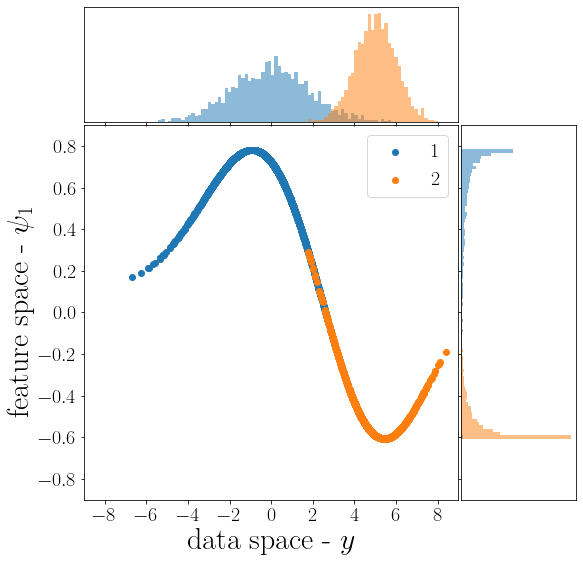

In [41]:
# definitions for the axes
left, width = 0.14, 0.65
bottom, height = 0.14, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

ax.set_xlim((-9, 9))
ax.set_ylim((-0.9, 0.9))


scatter_hist(data_1[0], data_pca_1[0], ax, ax_histx, ax_histy, label = "1")
scatter_hist(data_2[0], data_pca_2[0], ax, ax_histx, ax_histy, label = "2")
ax.legend(fontsize = 20)
ax.set_xlabel("data space - $y$", fontsize = 30)
ax.set_ylabel("feature space - $\psi_1$", fontsize = 30)
ax.set_yticks(np.arange(-0.8, 0.9, 0.2))
ax.set_xticks(np.arange(-8, 9, 2))
ax.tick_params(axis='both', which='major', labelsize=20)
plt.savefig("d_to_f.pdf")

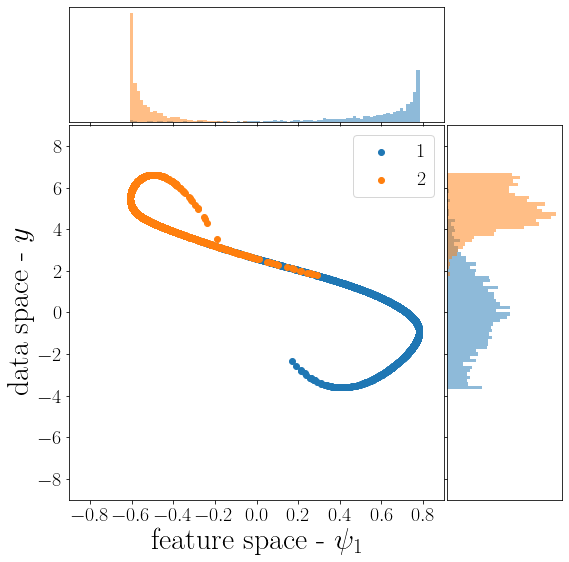

In [42]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

ax.set_ylim((-9, 9))
ax.set_xlim((-0.9, 0.9))


scatter_hist(data_pca_1[0], data_1_inv[0], ax, ax_histx, ax_histy, label = "1", range_y = (-8, 8), range_x = (-0.8, 0.8))
scatter_hist(data_pca_2[0], data_2_inv[0], ax, ax_histx, ax_histy, label = "2", range_y = (-8, 8), range_x = (-0.8, 0.8))
ax.legend(fontsize = 20)
ax.set_ylabel("data space - $y$", fontsize = 30)
ax.set_xlabel("feature space - $\psi_1$", fontsize = 30)
ax.set_xticks(np.arange(-0.8, 0.9, 0.2))
ax.set_yticks(np.arange(-8, 9, 2))
ax.tick_params(axis='both', which='major', labelsize=20)
plt.savefig("f_to_d.pdf")

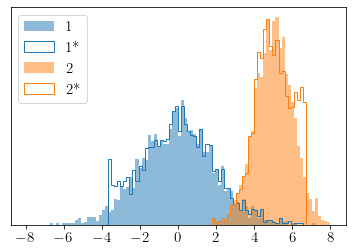

In [23]:
plt.figure()
plt.hist(data_1[0], bins = 100, range = (-8, 8), density = True, label = "1", alpha = 0.5)
plt.hist(data_1_inv[0], bins = 100, range = (-8, 8), density = True, label = "1*", histtype = "step", color = '#1f77b4')

plt.hist(data_2[0], bins = 100, range = (-8, 8), density = True, label = "2", alpha = 0.5)
plt.hist(data_2_inv[0], bins = 100, range = (-8, 8), density = True, label = "2*", histtype = "step", color = '#ff7f0e')

plt.yticks([])
plt.legend(loc = 'upper left', fontsize = 15)
plt.xticks(fontsize = 15)

plt.savefig("init_and_recovered.pdf")